# Create a shapefile outlining the Ross Ice Shelf

In [12]:
%load_ext autoreload
%autoreload 2

import pyogrio
from geopandas import testing
from antarctic_plots import maps, utils, regions, fetch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fetch MEaSUREs iceshelf boundaries
merge RIS east and west into 1 polygon

In [5]:
# fetch MEaSURES iceshelf shapefiles
measures_shelves = fetch.measures_boundaries(version="IceShelf")

# read into a geodataframe
ice_shelves = pyogrio.read_dataframe(measures_shelves)

# extract Ross Ice Shelf east and west polygons
RIS_seperate = ice_shelves[ice_shelves.NAME.isin(["Ross_West", "Ross_East"])]

# merge into 1 polygon
RIS = RIS_seperate.dissolve()

RIS

,geometry,NAME,Regions,TYPE
0,"POLYGON ((-240677.184 -678259.006, -240038.274...",Ross_West,West,FL


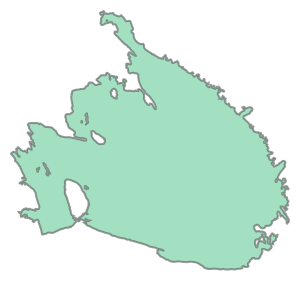

In [6]:
RIS.geometry[0]

# Save to a shapefile

In [3]:
RIS.to_file("../../plotting/RIS_outline.shp")

# Check that the output matches the above

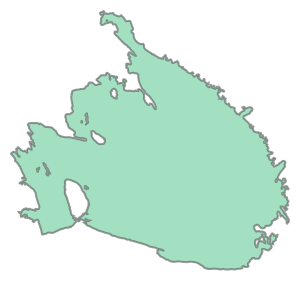

In [7]:
check = pyogrio.read_dataframe("../../plotting/RIS_outline.shp")
check.geometry[0]

In [16]:
check = check[["geometry", "NAME", "Regions", "TYPE"]]
check

,geometry,NAME,Regions,TYPE
0,"POLYGON ((-240677.184 -678259.006, -240038.274...",Ross_West,West,FL


In [17]:
gpd.testing.assert_geodataframe_equal(check, RIS)